In [0]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
pip install xmltodict

# 프로젝트 제목 : 국내 코로나 확진자 수와 현직 대통령 지지율 사이의 상관관계

- 2020년 1월 4주차 ~ 6월 1주차

- 우선 wikipedia에 있는 국내대통령 지지율 데이터를 뽑아오려고한다

In [0]:
url = 'https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EB%8C%80%ED%86%B5%EB%A0%B9_%EC%A7%80%EC%A7%80%EC%9C%A8'

resp = requests.get(url)

In [0]:
# 숲에 담고
soup = BeautifulSoup(resp.content, 'lxml')

In [0]:
tr_tag = soup.select('table.wikitable tr')

whole_txt = [] # tr을 가져오고, tr 안에 있는 원소하나당 텍스트를 가져와서 관련있는거 뽑아봐야겠다

for tr in tr_tag:

  whole_txt.append(tr.text)

whole_txt # 대강 이런모양

# 분석을 하기 위해 필요한 자료는 2020년 이후 지지율 데이터.
# 데이터 형식을 보면 그냥 표가 \n\n을 구분자로 무차별적인 텍스트로 들어왔다는 사실을 알 수 있다
# 그래서 tr의 한 원소를 for문을 이용해서 돌린다고 생각해 정규표현식으로 2020년으로 시작하는 데이터를 뽑기 위해 고군분투 했다.


['\n대통령 선거\n\n득표율\n',
 '\n2017년 대선\n\n41.1%\n',
 '\n조사 기간\n\n지지율\n\n조사 기간\n\n지지율\n\n조사 기간\n\n지지율\n\n조사 기간\n\n지지율\n',
 '\n한국갤럽[3]\n\n리얼미터[4]\n\n한국갤럽[3]\n\n리얼미터[4]\n\n한국갤럽[3]\n\n리얼미터[4]\n\n한국갤럽[3]\n\n리얼미터[4]\n',
 '\n2017년 5월 3주\n\n미조사[내용 2]\n\n81.6%\n\n2018년 5월 3주\n\n76.0%\n\n74.8%\n\n2019년 5월 3주\n\n44.0%\n\n49.6%\n\n2020년 5월 2주\n\n65.0%\n\n61.7%\n',
 '\n2017년 5월 4주\n\n84.1%\n\n2018년 5월 4주\n\n76.0%\n\n72.5%\n\n2019년 5월 4주\n\n46.0%\n\n50.0%\n\n2020년 5월 3주\n\n65.0%\n\n62.3%\n',
 '\n2017년 5월 5주\n\n78.1%\n\n2018년 5월 5주\n\n75.0%\n\n71.4%\n\n2019년 5월 5주\n\n45.0%\n\n48.3%\n\n2020년 5월 4주\n\n65.0%\n\n59.9%\n',
 '\n2017년 6월 1주\n\n84.0%\n\n78.9%\n\n2018년 6월 1주\n\n미조사[내용 3]\n\n2019년 6월 1주\n\n46.0%\n\n48.0%\n\n2020년 6월 1주\n\n62.0%\n\n59.1%\n',
 '\n2017년 6월 2주\n\n82.0%\n\n75.6%\n\n2018년 6월 2주\n\n79.0%\n\n75.9%\n\n2019년 6월 2주\n\n47.0%\n\n49.5%\n',
 '\n2017년 6월 3주\n\n83.0%\n\n74.2%\n\n2018년 6월 3주\n\n75.0%\n\n75.4%\n\n2019년 6월 3주\n\n45.0%\n\n46.7%\n',
 '\n2017년 6월 4주\n\n79.0%\n\n75.3%\n\n2018년 6월 4주\n\n7

In [0]:
data_2020 = [] #2020년 데이터를 apppend할 리스트를 만들어 놓고

for txt in whole_txt:
  if re.findall('\n(2020.+)\n', txt):
    data_2020.append(re.findall('\n(2020.+)\n', txt)) # re.findall의요소중 하나,re.DOTALL

                                                                 # 분명 (.+)은 욕심쟁이이라고 하셨는데 너무 겸손해, \n\n간격으로 하나만 뽑는다
                                                                 # 원래 \n...\n이면 끊어서 read함, 근데 re.DOTALL     
                                                                 # 해야 끝까지하나의 텍스트로 인식해서 .+ 쓸 수 있어                                                                                                                             

data_2020 # 이제 여기에 날짜와 선거율을 뽑아오자





[['2020년 5월 2주'],
 ['2020년 5월 3주'],
 ['2020년 5월 4주'],
 ['2020년 6월 1주'],
 ['2020년 1월 1주'],
 ['2020년 1월 2주'],
 ['2020년 1월 3주'],
 ['2020년 1월 4주'],
 ['2020년 1월 5주'],
 ['2020년 2월 1주'],
 ['2020년 2월 2주'],
 ['2020년 2월 3주'],
 ['2020년 2월 4주'],
 ['2020년 3월 1주'],
 ['2020년 3월 2주'],
 ['2020년 3월 3주'],
 ['2020년 3월 4주'],
 ['2020년 4월 1주'],
 ['2020년 4월 2주'],
 ['2020년 4월 3주'],
 ['2020년 4월 4주'],
 ['2020년 4월 5주'],
 ['2020년 5월 1주']]

In [0]:
data_2020 = [] #2020년 데이터를 apppend한 리스트를 만들어 놓고

for txt in whole_txt:
  if re.findall('\n(2020.+)\n', txt, re.DOTALL):
    data_2020.append(re.findall('\n(2020.+)\n', txt, re.DOTALL)) # re.findall의요소중 하나,re.DOTALL

                                                                 # 분명 (.+)은 욕심쟁이이라고 하셨는데 너무 겸손해, \n\n간격으로 하나만 뽑는다
                                                                 # 원래 \n...\n이면 끊어서 read함, 근데 re.DOTALL                                                               # 해야 끝까지하나의 텍스트로 인식해서 .+ 쓸 수 있어                                                                                                                             
data_2020                                                                


[['2020년 5월 2주\n\n65.0%\n\n61.7%'],
 ['2020년 5월 3주\n\n65.0%\n\n62.3%'],
 ['2020년 5월 4주\n\n65.0%\n\n59.9%'],
 ['2020년 6월 1주\n\n62.0%\n\n59.1%'],
 ['2020년 1월 1주\n\n49.0%'],
 ['2020년 1월 2주\n\n47.0%\n\n48.8%'],
 ['2020년 1월 3주\n\n45.0%\n\n45.3%'],
 ['2020년 1월 4주\n\n미조사[내용 7]\n\n47.0%'],
 ['2020년 1월 5주\n\n41.0%\n\n45.0%'],
 ['2020년 2월 1주\n\n44.0%\n\n46.9%'],
 ['2020년 2월 2주\n\n44.0%\n\n46.6%'],
 ['2020년 2월 3주\n\n45.0%\n\n47.4%'],
 ['2020년 2월 4주\n\n42.0%\n\n46.1%'],
 ['2020년 3월 1주\n\n44.0%\n\n47.9%'],
 ['2020년 3월 2주\n\n49.0%\n\n47.2%'],
 ['2020년 3월 3주\n\n49.0%\n\n49.3%'],
 ['2020년 3월 4주\n\n55.0%\n\n52.6%'],
 ['2020년 4월 1주\n\n56.0%\n\n53.7%'],
 ['2020년 4월 2주\n\n57.0%\n\n54.4%'],
 ['2020년 4월 3주\n\n59.0%\n\n58.3%'],
 ['2020년 4월 4주\n\n62.0%\n\n63.7%'],
 ['2020년 4월 5주\n\n64.0%\n\n60.6%'],
 ['2020년 5월 1주\n\n71.0%\n\n62.0%']]

In [0]:
# 날짜와 선거율을 뽑아오자

date = []
app_rate = []

k= data_2020[4:]+ data_2020[:4] # 시간순으로 만들자, 데이터의 형식이 첫 4개가 2020년 5월 자료, 즉 최신자료이므로
wanted  = k[3:]                          # 리스트의 expand는 덧셈과 같다고 하여 그냥 더했다.


In [0]:
for data in wanted:
  date.append(data[0].split('\n\n')[0])
  app_rate.append(float(data[0].split('\n\n')[-1][:4])*0.01)    #여기서 실수로 만들어줌. 그래야 나중에 계산할수 있어.,
 # split한 거에 마지막 원소를 뽑고 거기서 4개만 뽑아 float을 시켜주고 0.01을 곱한다( % 삭제를 위함 )
         
rate = {'date': date, 'app_rate' : app_rate}

df_rate = pd.DataFrame(rate) #딕셔너리로 만들어 데이터프레임으로 만들장~
df_rate

,date,app_rate
0,2020년 1월 4주,0.470
1,2020년 1월 5주,0.450
2,2020년 2월 1주,0.469
3,2020년 2월 2주,0.466
4,2020년 2월 3주,0.474
5,2020년 2월 4주,0.461
6,2020년 3월 1주,0.479
7,2020년 3월 2주,0.472
8,2020년 3월 3주,0.493
9,2020년 3월 4주,0.526


In [0]:
kk = pd.read_csv('asd.csv') # 이건 동명님이 해주심# 이걸 따로읽어.

In [0]:
url = 'https://github.com/jooeungen/coronaboard_kr/blob/master/kr_daily.csv'
#코로나 확진자 데이터 크롤링

resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'lxml')

patient = soup.select('td')
patient.pop(0)
patient

date = []
confirmed = []


for i in range(140):
  date.append(patient[7*i + 1])                                                 #patient 자료 중 각 (7*i + 1)번째 리스트 자료가 각 날짜
  confirmed.append(patient[7*i + 2])                                            #patient 자료 중 각 (7*i + 2)번째 리스트 자료가 날짜 별 코로나 확진자 명 수

for i in range(140):
  date[i] = str(date[i]).strip('<td></td>')                                     #날짜와 확진자만 나오도록 문자열 처리
  confirmed[i] = str(confirmed[i]).strip('<td></td>')

data_tom = []
con_new = confirmed[1:]                                                         #확진자 데이터는 누적데이터이므로 누적데이터 중 
con_new.append(0)                                                               #i번째 값을 i+1 값에서 빼주면 일별 데이터 계산 가능
con_new
diff = []
for i in range(len(con_new)):
  diff.append(int(con_new[i]) - int(confirmed[i]))

diff


diff[0] = 1

diff[139] = 38

data = pd.DataFrame({"날짜" : date, "확진자" : diff})                           #날짜가 첫번째, 확진자가 두번째 열인 dataframe 생성
data

data.to_csv('확진자.csv', index=False)

weekly = []
for i in range(19):                                                             #확진자 데이터는 일별 데이터이므로 주별 데이터를 계산하기 위해 7일 간격으로 합해줌
  weekly.append(data.iloc[7*i + 5]["확진자"] + data.iloc[7*i + 6]["확진자"] + data.iloc[7*i + 7]["확진자"] + data.iloc[7*i + 8]["확진자"] + data.iloc[7*i + 9]["확진자"] + data.iloc[7*i + 10]["확진자"] + data.iloc[7*i + 11]["확진자"])

weekly.insert(0, 2)
weekly

[2,
 13,
 12,
 2,
 579,
 3128,
 3398,
 1028,
 735,
 686,
 654,
 275,
 149,
 67,
 65,
 81,
 176,
 140,
 278,
 308]

In [0]:
# 정당 리스트까지 뽑아주심, 한 번에 볼까?
kkk = pd.read_csv('jeongdang.csv') # 이건 동명님이 해주심# 이걸 따로읽어.

In [0]:
url = 'https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EC%A0%95%EB%8B%B9_%EC%A7%80%EC%A7%80%EC%9C%A8'
#위키피디아 내 정당 별 지지율 크롤링
resp = requests.get(url)
soup = BeautifulSoup(resp.content, 'lxml')

app_rate = soup.select('table.wikitable tr')
whole= []
for tr in app_rate:
  whole.append(tr.text)

whole           #모든 text값

year = []
for i in whole:
  if re.findall('2020.+', i, re.DOTALL):                  #2020년이 붙은 리스트만 뽑기 위한 정규표현식
    year.append(re.findall('2020.+', i, re.DOTALL))

year.pop(0)                                               #1월 첫번째 주 삭제
year
year.pop(0)                                               #1월 두번째 주 삭제
year
year.pop(0)                                               #1월 세번째 주 삭제
year
year.pop(13)                                              #선거 전 설문조사 없음 삭제
year

year2 = []
for i in range(20):
  year2.append(str(year[i]).split('\\n\\n'))              #정당 별로 지지율 split

year2[0][1] = '36.5%'                                     #결측값 전주와 다음주의 평균치로 대체

week = []
dem = []
rep = []
for i in range(20):
  week.append(year2[i][0])                                  #각 리스트의 첫번째 데이터 = 주 차
  dem.append(year2[i][1])                                   #각 리스트의 두번째 데이터 = 민주당 지지율
  rep.append(year2[i][4])                                   #각 리스트의 다섯번째 데이터 = 자유한국당 지지율



rep[0] = '32.1'                                             #결측값 리얼미터 데이터로 대체
rep[14] = '28.0'

rep

for i in range(20):
  dem[i] = dem[i].strip('%')                                #% 삭제
  rep[i] = rep[i].strip('%')

for i in range(20):
  dem[i] = float(dem[i])*0.01                               #지지율 유리수 변환
  rep[i] = float(rep[i])*0.01


In [0]:
table = pd.read_csv('table11.csv') 

In [0]:
table

,stock
0,2262.64
1,2185.28
2,2165.63
3,2238.38
4,2210.34
5,2076.77
6,2059.33
7,1908.27
8,1591.20
9,1704.76


In [0]:
concat_data = pd.concat([df_rate, kk, kkk, table], axis=1) # 콘캣 리스트 에이비. 열 추가(풀을 1 로 발라야지)니까. axis=0, 같은건 없으니 뭐지 아님

In [0]:
concat_data

,date,app_rate,weekly,더불어민주당,자유한국당,stock
0,2020년 1월 4주,0.470,2,0.365,0.321,2262.64
1,2020년 1월 5주,0.450,13,0.340,0.210,2185.28
2,2020년 2월 1주,0.469,12,0.360,0.200,2165.63
3,2020년 2월 2주,0.466,2,0.370,0.210,2238.38
4,2020년 2월 3주,0.474,579,0.360,0.230,2210.34
5,2020년 2월 4주,0.461,3128,0.370,0.210,2076.77
6,2020년 3월 1주,0.479,3398,0.360,0.220,2059.33
7,2020년 3월 2주,0.472,1028,0.390,0.220,1908.27
8,2020년 3월 3주,0.493,735,0.380,0.230,1591.20
9,2020년 3월 4주,0.526,686,0.370,0.220,1704.76


In [0]:
concat_data[['weekly','app_rate', '더불어민주당', '자유한국당', 'stock']].corr() # 콘캣 리스트 에이비
                               # 꽤중요한데, 파일을 데이터로 불러들이면 보통 자료형태가 별로여서 int나 float으로 지정해줘야지
                               # corr() 메서드가 기동한다.

,weekly,app_rate,더불어민주당,자유한국당,stock
weekly,1.000000,-0.391791,-0.345160,-0.037899,-0.030578
app_rate,-0.391791,1.000000,0.905647,-0.298328,-0.284953
더불어민주당,-0.345160,0.905647,1.000000,-0.374008,-0.257386
자유한국당,-0.037899,-0.298328,-0.374008,1.000000,-0.069924
stock,-0.030578,-0.284953,-0.257386,-0.069924,1.000000


In [0]:
# x축 이름 단순하게
x=[]
for i in range(20):
  x.append(concat_data['date'][i][6:].replace('월','m').replace('주', 'w'))

x 


['1m 4w',
 '1m 5w',
 '2m 1w',
 '2m 2w',
 '2m 3w',
 '2m 4w',
 '3m 1w',
 '3m 2w',
 '3m 3w',
 '3m 4w',
 '4m 1w',
 '4m 2w',
 '4m 3w',
 '4m 4w',
 '4m 5w',
 '5m 1w',
 '5m 2w',
 '5m 3w',
 '5m 4w',
 '6m 1w']

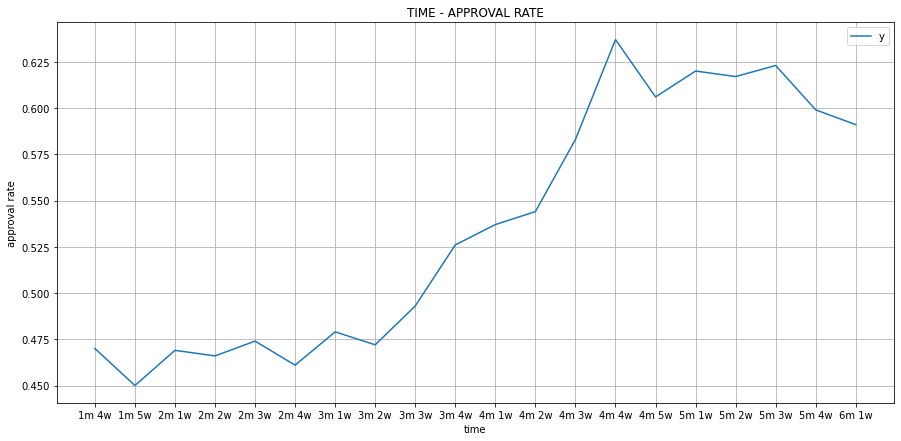

In [0]:
plt.figure(figsize=(15,7))  
plt.plot(x, concat_data['app_rate'])
plt.xlabel('time')
plt.ylabel('approval rate')
plt.title('TIME - APPROVAL RATE')
plt.legend('y', loc = 'best')
plt.grid()
plt.show()

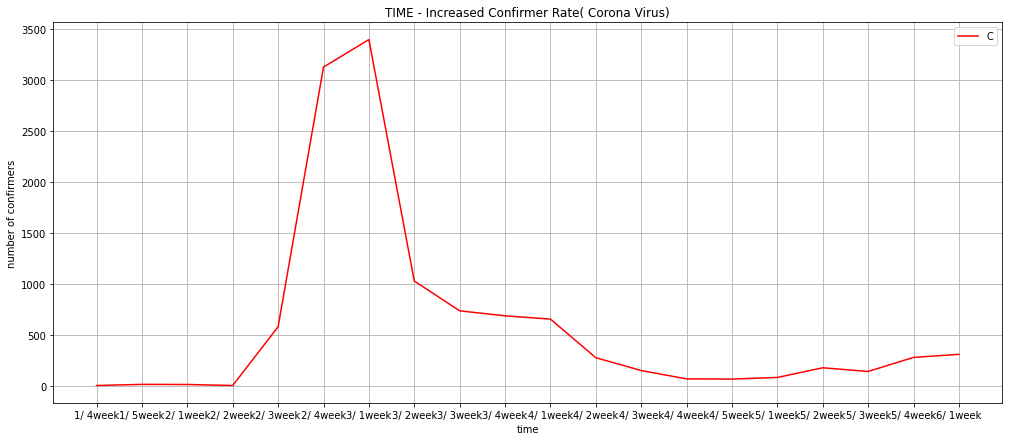

In [0]:
plt.figure(figsize=(17,7))  
plt.plot(x, concat_data['weekly'], c ='r')
plt.xlabel('time')
plt.ylabel('number of confirmers')
plt.title('TIME - Increased Confirmer Rate( Corona Virus)')
plt.legend('C', loc = 'best')
plt.grid()
plt.show()

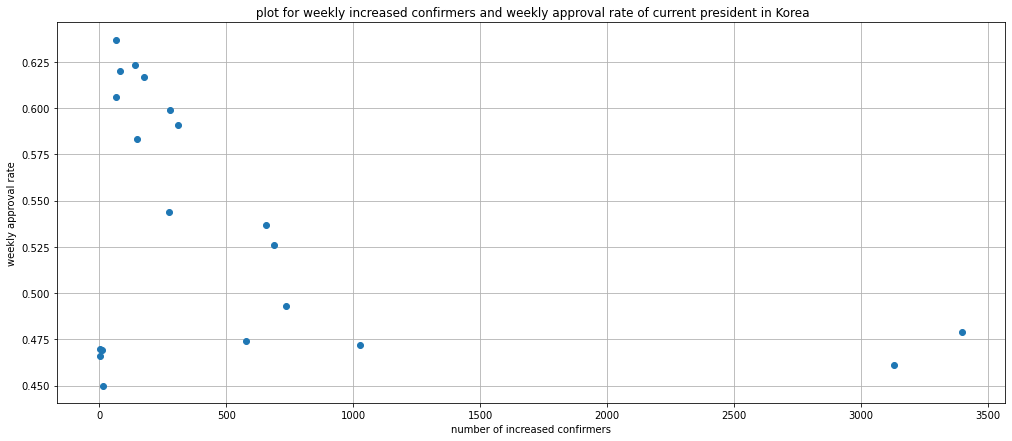

In [0]:
plt.figure(figsize=(17,7))  
plt.plot(concat_data['weekly'],concat_data['app_rate'] , 'o')# 표본이적지만.. 일단.. 해보장..
plt.xlabel('number of increased confirmers')
plt.ylabel('weekly approval rate')
plt.title(' plot for weekly increased confirmers and weekly approval rate of current president in Korea')
plt.grid()
plt.show()

In [0]:
concat_data.describe()

,app_rate,weekly,더불어민주당,자유한국당,stock
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.535850,588.800000,0.402250,0.218550,1988.552000
std,0.067066,961.462351,0.040343,0.036171,195.568228
min,0.450000,2.000000,0.340000,0.170000,1591.200000
25%,0.471500,66.500000,0.368750,0.197500,1885.795000
50%,0.531500,225.500000,0.400000,0.220000,2005.195000
75%,0.600750,662.000000,0.432500,0.230000,2170.542500
max,0.637000,3398.000000,0.470000,0.321000,2262.640000


In [0]:
from sklearn.linear_model import LinearRegression

line_fitter = LinearRegression()
line_fitter.fit(concat_data['weekly'].values.reshape(-1,1), concat_data['app_rate'] )

print(line_fitter.coef_()

# p값이 안나와 ㅠㅠ 그래프만 그려볼게
plt.plot(concat_data['weekly'],concat_data['app_rate'] , 'o')
# plt.plot(concat_data['weekly'],line_fitter.predict(concat_data['weekly'].values.reshape(-1,1)))
# plt.show()

SyntaxError: ignored

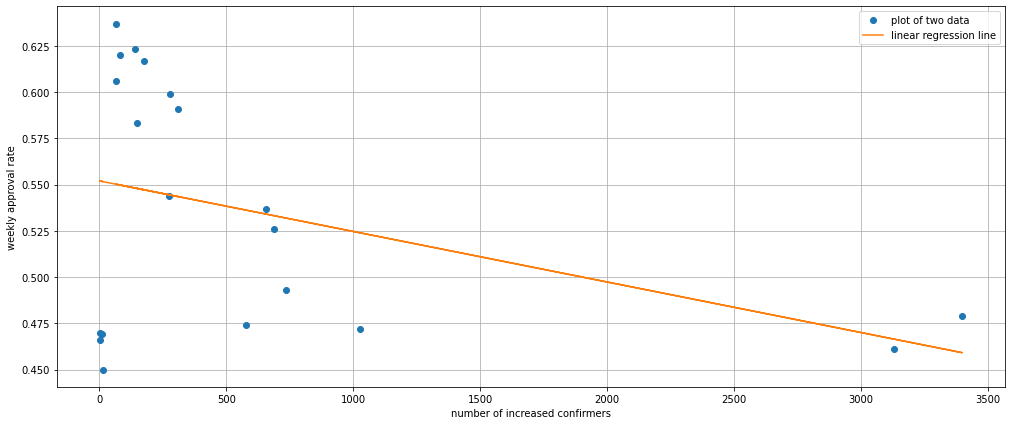

In [0]:
plt.figure(figsize=(17,7))
plt.plot(concat_data['weekly'],concat_data['app_rate'] , 'o', label = 'plot of two data')
plt.plot(concat_data['weekly'],line_fitter.predict(concat_data['weekly'].values.reshape(-1,1)), label = 'linear regression line')
plt.grid()
plt.xlabel('number of increased confirmers')
plt.ylabel('weekly approval rate')
plt.legend()
plt.show()

In [0]:
# 뽑은 선형회귀식에 p-값을 알기 위해 statsmode, scipy, 등등 추가

import pandas as pd
import numpy as np
from sklearn import datasets, linear_model
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from scipy import stats


X = concat_data['weekly']
y = concat_data['app_rate']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary()) # 뭐 이런거쓰면 회귀분석 결과 나와서 해봤습니당.

                            OLS Regression Results                            
Dep. Variable:               app_rate   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.106
Method:                 Least Squares   F-statistic:                     3.264
Date:                Tue, 09 Jun 2020   Prob (F-statistic):             0.0876
Time:                        05:59:41   Log-Likelihood:                 27.842
No. Observations:                  20   AIC:                            -51.68
Df Residuals:                      18   BIC:                            -49.69
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5519      0.017     32.969      0.0

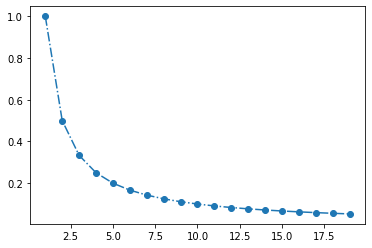

In [0]:
# 음 근데, 분포를 보니 뭔가 Y=1/X 형태야


x = [i for i in range(1, 20, 1)]
y=[]
for x_i in x:
  y.append(1/x_i)
plt.plot(x, y, marker='o', linestyle='-.') #plot(x값, y값)
plt.show()


In [0]:
# 그럼 이제 데이터를 조작해보자.. 그냥 뭐랄까 숫자의 단위가 너무 달라서그냥 x축(감염자 수)를
# 분자분모 바꾼 데이터를 한 번만들어보자
concat_data['weekly'] = 1/concat_data['weekly']
concat_data


,date,app_rate,weekly,더불어민주당,자유한국당
0,2020년 1월 4주,0.470,0.500000,0.365,0.321
1,2020년 1월 5주,0.450,0.076923,0.340,0.210
2,2020년 2월 1주,0.469,0.083333,0.360,0.200
3,2020년 2월 2주,0.466,0.500000,0.370,0.210
4,2020년 2월 3주,0.474,0.001727,0.360,0.230
5,2020년 2월 4주,0.461,0.000320,0.370,0.210
6,2020년 3월 1주,0.479,0.000294,0.360,0.220
7,2020년 3월 2주,0.472,0.000973,0.390,0.220
8,2020년 3월 3주,0.493,0.001361,0.380,0.230
9,2020년 3월 4주,0.526,0.001458,0.370,0.220


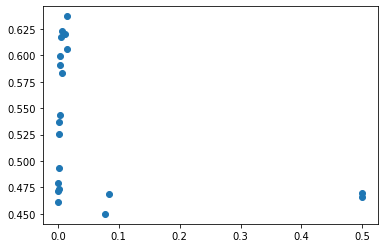

In [0]:
plt.plot(concat_data['weekly'],concat_data['app_rate'] , 'o')

In [0]:
X = concat_data['weekly']
y = concat_data['app_rate']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary()) # 뭐 이런거쓰면 회귀분석 결과 나와서 해봤습니당.

#더 의미없어,,이렇게 모델을 찾아주는걸 나중에 배우지 않을까?

                            OLS Regression Results                            
Dep. Variable:               app_rate   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3.179
Date:                Tue, 09 Jun 2020   Prob (F-statistic):             0.0915
Time:                        06:11:08   Log-Likelihood:                 27.802
No. Observations:                  20   AIC:                            -51.60
Df Residuals:                      18   BIC:                            -49.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5465      0.015     35.475      0.0

In [0]:
concat_data['weekly'] = 3000/concat_data['weekly']

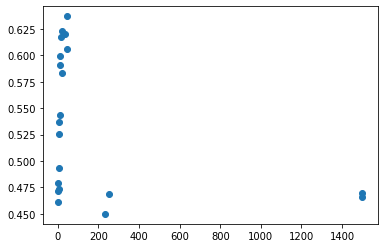

In [0]:
plt.plot(concat_data['weekly'],concat_data['app_rate'] , 'o')

In [0]:
X = concat_data['weekly']
y = concat_data['app_rate']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary()) # 뭐 이런거쓰면 회귀분석 결과 나와서 해봤습니당.

                            OLS Regression Results                            
Dep. Variable:               app_rate   R-squared:                       0.150
Model:                            OLS   Adj. R-squared:                  0.103
Method:                 Least Squares   F-statistic:                     3.179
Date:                Tue, 09 Jun 2020   Prob (F-statistic):             0.0915
Time:                        06:14:11   Log-Likelihood:                 27.802
No. Observations:                  20   AIC:                            -51.60
Df Residuals:                      18   BIC:                            -49.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5465      0.015     35.475      0.0

In [0]:
concat_data['weekly'] = (concat_data['weekly'])**0.25

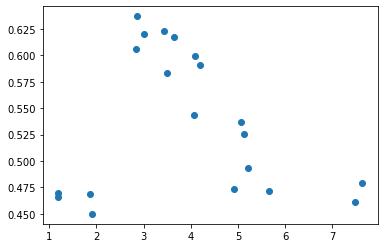

In [0]:
plt.plot(concat_data['weekly'],concat_data['app_rate'] , 'o')

In [0]:
X = concat_data['weekly']
y = concat_data['app_rate']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary()) # 뭐 이런거쓰면 회귀분석 결과 나와서 해봤습니당.

                            OLS Regression Results                            
Dep. Variable:               app_rate   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.031
Method:                 Least Squares   F-statistic:                    0.4324
Date:                Tue, 09 Jun 2020   Prob (F-statistic):              0.519
Time:                        06:21:31   Log-Likelihood:                 26.413
No. Observations:                  20   AIC:                            -48.83
Df Residuals:                      18   BIC:                            -46.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5583      0.037     14.940      0.0

In [0]:
# 조금 토나오지만
# 그래도 현재 나와있는 주차를 직접 입력하고
# 최신화 데이터 얻는 함수를 얻는거 낫지 않을까?
# 라는생각에서 함수를 만들었습니다.

In [0]:
today = input('https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EB%8C%80%ED%86%B5%EB%A0%B9_%EC%A7%80%EC%A7%80%EC%9C%A8 \n 해당 url 하단 표에 마지막 나와있는 주차를 그대로 입력해주세요 ex)2020년 6월 1주')
def get_csv_aprate(today): 
  date_dic = {}                         #데이터가 너무거지같아서, 직접 딕셔너리를 만들어서, 해당 인덱스를 지칭해줘서
                                        # 1월 4주차부터 현재까지슬라이싱 하기위해 만듬
  date_dic['2020년 5월 2주']= 1
  date_dic['2020년 5월 3주']= 2
  date_dic['2020년 5월 4주'] =3
  date_dic['2020년 6월 1주']= 4
  date_dic['2020년 6월 2주']= 5
  date_dic['2020년 6월 3주']= 6
  date_dic['2020년 6월 4주']= 7
  date_dic['2020년 7월 1주']= 8
  date_dic['2020년 7월 2주']= 9
  date_dic['2020년 7월 3주']= 10
  date_dic['2020년 7월 4주']= 11
  date_dic['2020년 7월 5주']= 12
  date_dic['2020년 8월 1주']= 13
  date_dic['2020년 8월 2주']= 14
  date_dic['2020년 8월 3주']= 15
  date_dic['2020년 8월 4주']= 16
  date_dic['2020년 9월 1주']= 17
  date_dic['2020년 9월 2주']= 18
  date_dic['2020년 9월 3주']= 19
  date_dic['2020년 9월 4주']= 20
  date_dic['2020년 9월 5주']= 21
  date_dic['2020년 10월 1주']= 22
  date_dic['2020년 10월 2주']= 23
  date_dic['2020년 10월 3주']= 24
  date_dic['2020년 10월 4주']= 25
  date_dic['2020년 11월 1주']= 26
  date_dic['2020년 11월 2주']= 27
  date_dic['2020년 11월 3주']= 28
  date_dic['2020년 11월 4주']= 29
  date_dic['2020년 12월 1주']= 30
  date_dic['2020년 12월 2주']= 31
  date_dic['2020년 12월 3주']= 32
  date_dic['2020년 12월 4주']= 33
  date_dic['2020년 12월 5주']= 34

  url = 'https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EB%8C%80%ED%86%B5%EB%A0%B9_%EC%A7%80%EC%A7%80%EC%9C%A8'
  resp = requests.get(url)
  soup = BeautifulSoup(resp.content, 'lxml')

  tr_tag = soup.select('table.wikitable tr')

  whole_txt = [] # tr을 가져오고, tr 안에 있는 원소하나당 텍스트를 가져와서 관련있는거 뽑아봐야겠다

  for tr in tr_tag:

    whole_txt.append(tr.text)

  data_2020 = [] #2020년 데이터를 apppend한 리스트를 만들어 놓고

  for txt in whole_txt:
    if re.findall('\n(2020.+)\n', txt, re.DOTALL):
      data_2020.append(re.findall('\n(2020.+)\n', txt, re.DOTALL))

  date = []
  app_rate = []
  dateindex = date_dic[today]

  k= data_2020[dateindex:]+ data_2020[:dateindex] # 시간순으로 만들자, 데이터의 형식이 첫 4개가 2020년 5월 자료, 즉 최신자료이므로
  wanted  = k[4:]      

  for data in wanted:
    date.append(data[0].split('\n\n')[0])
    app_rate.append(float(data[0].split('\n\n')[-1][:4])*0.01)    #여기서 실수로 만들어줌. 그래야 나중에 계산할수 있어.,
  # split한 거에 마지막 원소를 뽑고 거기서 4개만 뽑아 float을 시켜주고 0.01을 곱한다( % 삭제를 위함 )
          
  rate = {'date': date, 'app_rate' : app_rate}

  df_rate = pd.DataFrame(rate) #딕셔너리로 만들어 데이터프레임으로 만들장~
  return df_rate

get_csv_aprate(today)


https://ko.wikipedia.org/wiki/%EB%8C%80%ED%95%9C%EB%AF%BC%EA%B5%AD%EC%9D%98_%EB%8C%80%ED%86%B5%EB%A0%B9_%EC%A7%80%EC%A7%80%EC%9C%A8 
 해당 url 하단 표에 마지막 나와있는 주차를 그대로 입력해주세요 ex)2020년 6월 1주2020년 5월 4주


,date,app_rate
0,2020년 1월 4주,0.470
1,2020년 1월 5주,0.450
2,2020년 2월 1주,0.469
3,2020년 2월 2주,0.466
4,2020년 2월 3주,0.474
5,2020년 2월 4주,0.461
6,2020년 3월 1주,0.479
7,2020년 3월 2주,0.472
8,2020년 3월 3주,0.493
9,2020년 3월 4주,0.526
